# PCA for Dimensionality reduction

Sometimes we use PCA not for data visualisation but just to reduce the no. of columns of the data. In this case the resultant<br>
no. of dimension of the data does not matters, what matters is the amount of variance captured by our dimensionally reduced data.

if we want to reduce the dimension to **2**, the amount of variance captured by the 2 dimension can be calculated by adding <br>
up the largest two eigen values and dividing it by the sum of all the eigen values. The resultant value tells the amount of <br>
variance captured by the 2 dimension.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Download the data from
#https://www.kaggle.com/c/digit-recognizer/data
d0 = pd.read_csv('train.csv')

In [5]:
d0.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#save label in l
l = d0['label']

In [7]:
#dropping the label columns
d = d0.drop("label", axis = 1)

In [9]:
print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


In [10]:
#choose 15k data points
labels = l.head(15000)
data = d.head(15000)

In [11]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)


In [13]:
standardized_data.shape

(15000, 784)

In [15]:
sample_data = standardized_data


The shape of the covariance matrix= (784, 784)


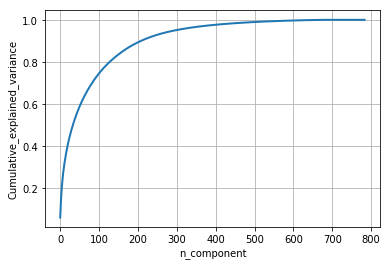

In [28]:
from sklearn import decomposition 
#Initialize PCA
pca = decomposition.PCA()

#No.of components = 784
pca.n_components = 784 

pca_data = pca.fit_transform(sample_data)

#Calculating individual variance captured by the Eigen values(lambda1/sum(lambda))
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)

#Taking the cumulative sum of the eigen valeus, lambda1/sum(lambda) , (lambda1+lamda2)/sum(lambda), (lambda1+lambda2+lambda3)/sum(lambda)
cum_var_explained = np.cumsum(percentage_var_explained)

#plotting the variance captured by the different eigen values
plt.clf()
plt.plot(cum_var_explained, linewidth =2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_component')
plt.ylabel('Cumulative_explained_variance')
plt.show()


As it can be seen from the graph as the no. of components increase the variance captured by the data also increases. 
So, as the dimension of the data is reduced the variance captured by data is also reduced in other words we loose some information